<h2>
Projekt AI - Predykcja wystąpienia wypadku samochodowego - Borys Stelmaszyk, Michał Pacuła
</h2>

<h3>Imports</h3>

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv('dataset_traffic_accident_prediction1.csv')

<h3>Cleaning data</h3>

In [160]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [161]:
df.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

In [162]:
df.drop(['Driver_Experience', 'Vehicle_Type', 'Accident_Severity', 'Road_Light_Condition'], axis=1, inplace=True)

In [163]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Driver_Age,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Wet,51.0,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Wet,49.0,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Icy,54.0,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Under Construction,34.0,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Dry,62.0,1.0


In [164]:
df.dtypes

Weather                object
Road_Type              object
Time_of_Day            object
Traffic_Density       float64
Speed_Limit           float64
Number_of_Vehicles    float64
Driver_Alcohol        float64
Road_Condition         object
Driver_Age            float64
Accident              float64
dtype: object

In [165]:
df.duplicated().sum()

np.int64(17)

In [166]:
df.drop_duplicates(inplace=True)

In [167]:
df.duplicated().sum()

np.int64(0)

In [168]:
df.isna().sum()

Weather               42
Road_Type             42
Time_of_Day           41
Traffic_Density       42
Speed_Limit           42
Number_of_Vehicles    42
Driver_Alcohol        42
Road_Condition        42
Driver_Age            42
Accident              42
dtype: int64

In [169]:
for value in df.columns:
    df[value] = df[value].fillna(df[value].mode()[0])

In [170]:
df.isna().sum()

Weather               0
Road_Type             0
Time_of_Day           0
Traffic_Density       0
Speed_Limit           0
Number_of_Vehicles    0
Driver_Alcohol        0
Road_Condition        0
Driver_Age            0
Accident              0
dtype: int64

In [171]:
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Driver_Age,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Wet,51.0,0.0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Wet,49.0,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Icy,54.0,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Under Construction,34.0,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Dry,62.0,1.0
...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Dry,23.0,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Dry,52.0,1.0
837,Foggy,Highway,Evening,1.0,30.0,4.0,1.0,Dry,46.0,0.0
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Dry,25.0,0.0


In [172]:
df = df.astype({'Traffic_Density' : 'int', 'Speed_Limit' : 'int', 'Number_of_Vehicles' : 'int', 'Driver_Alcohol' : 'int', 'Accident' : 'int', 'Driver_Age' : 'int'})

In [173]:
df.dtypes

Weather               object
Road_Type             object
Time_of_Day           object
Traffic_Density        int64
Speed_Limit            int64
Number_of_Vehicles     int64
Driver_Alcohol         int64
Road_Condition        object
Driver_Age             int64
Accident               int64
dtype: object

In [174]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Driver_Age,Accident
0,Rainy,City Road,Morning,1,100,5,0,Wet,51,0
1,Clear,Rural Road,Night,1,120,3,0,Wet,49,0
2,Rainy,Highway,Evening,1,60,4,0,Icy,54,0
3,Clear,City Road,Afternoon,2,60,3,0,Under Construction,34,0
4,Rainy,Highway,Morning,1,195,11,0,Dry,62,1


In [175]:
categorical_columns = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Accident,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Stormy,Road_Type_Highway,Road_Type_Mountain Road,Road_Type_Rural Road,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet
0,1,100,5,0,51,0,False,True,False,False,False,False,False,False,True,False,False,False,True
1,1,120,3,0,49,0,False,False,False,False,False,False,True,False,False,True,False,False,True
2,1,60,4,0,54,0,False,True,False,False,True,False,False,True,False,False,True,False,False
3,2,60,3,0,34,0,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1,195,11,0,62,1,False,True,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2,30,4,0,23,0,False,False,False,False,True,False,False,False,False,True,False,False,False
836,2,60,4,0,52,1,False,True,False,False,False,False,True,True,False,False,False,False,False
837,1,30,4,1,46,0,True,False,False,False,True,False,False,True,False,False,False,False,False
838,2,60,3,0,25,0,True,False,False,False,True,False,False,False,False,False,False,False,False


In [176]:
X = df.drop(columns=['Accident']) 
y = df['Accident']    

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h3>Decision Tree Model</h3>

In [178]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 10, 20],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters for DecisionTreeClassifier are:", grid_search.best_params_)


Best Parameters for DecisionTreeClassifier are: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 50, 'splitter': 'best'}


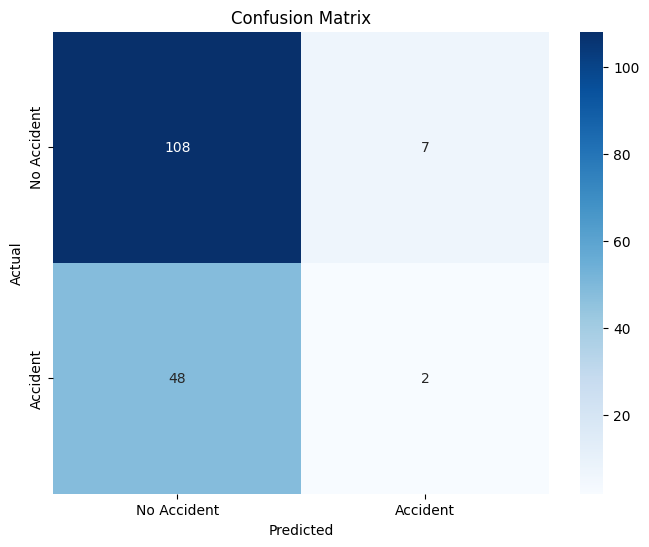

In [179]:
clf = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                            min_samples_split=grid_search.best_params_['min_samples_split'], max_features=grid_search.best_params_['max_features'],
                            max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'], min_impurity_decrease=grid_search.best_params_['min_impurity_decrease'],
                            class_weight=grid_search.best_params_['class_weight'], splitter=grid_search.best_params_['splitter'])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

class_names = ['No Accident', 'Accident']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


<h3>Random Forest Model</h3>

In [180]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
} 


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 200}


Accuracy: 0.6909090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.99      0.82       115
           1       0.00      0.00      0.00        50

    accuracy                           0.69       165
   macro avg       0.35      0.50      0.41       165
weighted avg       0.48      0.69      0.57       165



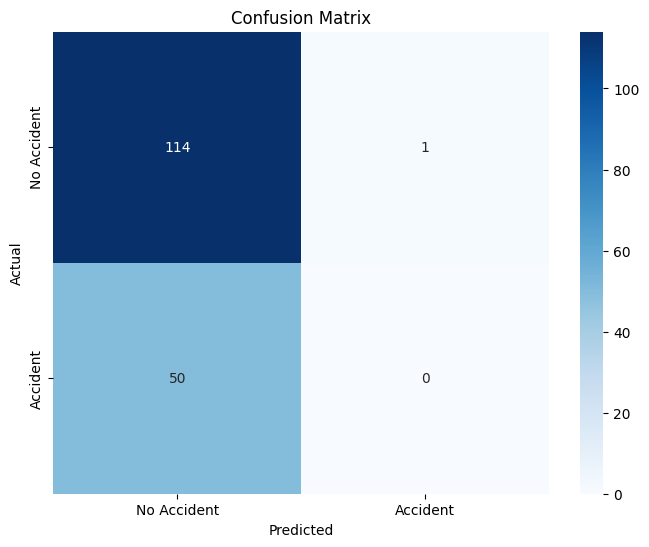

In [181]:
rf_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'],
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'], min_samples_split=grid_search.best_params_['min_samples_split'],
                                max_features=grid_search.best_params_['max_features'], bootstrap=grid_search.best_params_['bootstrap'])
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Accident', 'Accident'], yticklabels=['No Accident', 'Accident'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h3>Logisitic Regression Model</h3>

In [182]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000],
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.01, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\micha\Documents\Studia\AI_Pro

Accuracy: 0.696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       115
           1       0.00      0.00      0.00        50

    accuracy                           0.70       165
   macro avg       0.35      0.50      0.41       165
weighted avg       0.49      0.70      0.57       165



c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

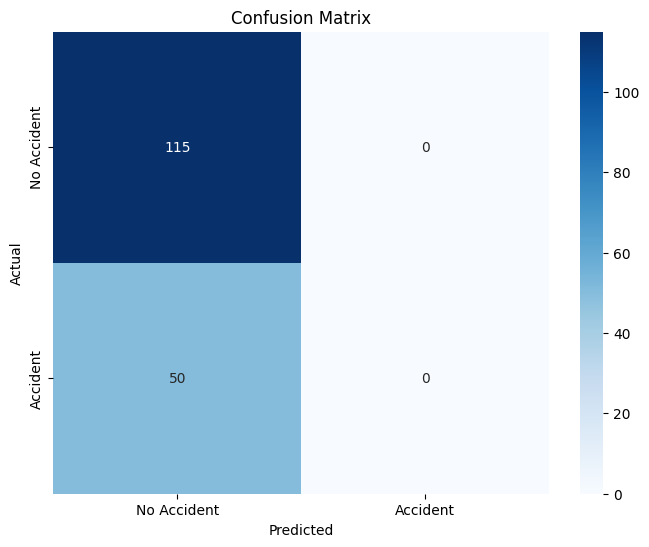

In [183]:
log_reg = LogisticRegression(max_iter=grid_search.best_params_['max_iter'], C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'],
                            solver=grid_search.best_params_['solver'], fit_intercept=grid_search.best_params_['fit_intercept'])
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Accident', 'Accident'], yticklabels=['No Accident', 'Accident'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h3>Simple Neural Network</h3>

In [184]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

c:\Users\micha\Documents\Studia\AI_Projekt\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6864 - loss: 0.6100 - val_accuracy: 0.6894 - val_loss: 0.6226
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6889 - loss: 0.6119 - val_accuracy: 0.6970 - val_loss: 0.6205
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6998 - loss: 0.5908 - val_accuracy: 0.7045 - val_loss: 0.6191
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7177 - loss: 0.5903 - val_accuracy: 0.7045 - val_loss: 0.6198
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6878 - loss: 0.6092 - val_accuracy: 0.7045 - val_loss: 0.6188
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7213 - loss: 0.5698 - val_accuracy: 0.7197 - val_loss: 0.6184
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7535 - loss: 0.5342 - val_accuracy: 0.7197 - val_loss: 0.6196
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7349 - loss: 0.5378 - val_accuracy: 0.7045 - val_loss

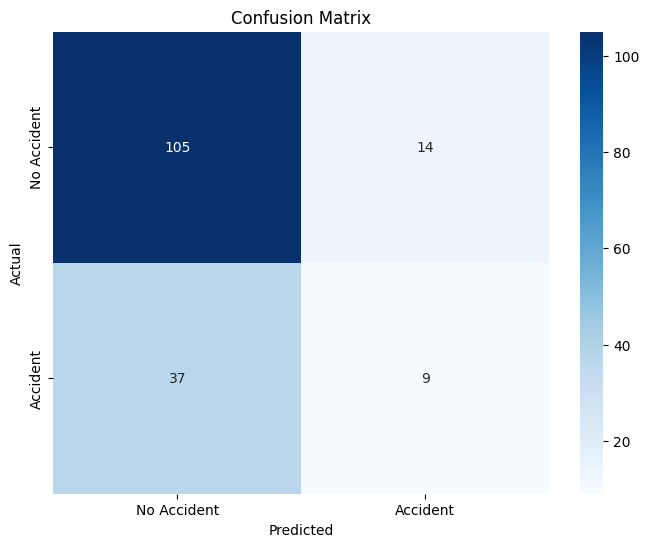

In [185]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Accident', 'Accident'], yticklabels=['No Accident', 'Accident'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()